### <font color=#0000FF>Import all the modules</font>


In [2]:
from keras.datasets import cifar10
import keras
from keras.models import Sequential         #Sequential做初始化
from keras.layers.core import Dropout,Flatten,Dense #Dropout--避免overfitting,Flatten--變數攤平,Dense--做全連結的網路層
from keras.callbacks import ModelCheckpoint  #模式設定
import matplotlib.pyplot as plt      
import numpy as np
%matplotlib inline   #直接在jupyter notebook上畫出

### <font color=#0000FF>Load the train and test images</font>

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()#原始cifar10 就分為四個部分,X為matrix(矩陣)y為vector(向量)


In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### <font color=#0000FF>Examine the shapes of train(50000張) and test(10000張) images</font>

In [4]:
print("Shape of training image dataset:{}".format(X_train.shape))#50000筆,32*32,3個channel(RGB)
print("Shape of training label dataset:{}".format(y_train.shape))#50000筆,一個維度(ex.bird,plane)
print("Shape of testing image dataset:{}".format(X_test.shape))
print("Shape of testing label dataset:{}".format(y_test.shape))

Shape of training image dataset:(50000, 32, 32, 3)
Shape of training label dataset:(50000, 1)
Shape of testing image dataset:(10000, 32, 32, 3)
Shape of testing label dataset:(10000, 1)


### <font color=#0000FF>Visualize the first 36 images in the train dataset</font>

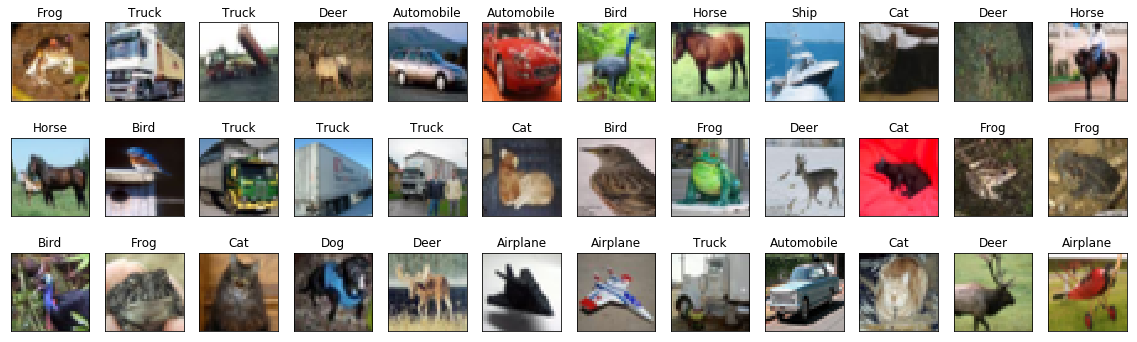

In [5]:
StringLabels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
fig = plt.figure(figsize=(20,6))  #20*6為畫布大小
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])#分成3列12行，依序產生,xticks,yticks不顯示東西，所以x,y坐標不會有東西
    ax.imshow(X_train[i]) #顯示出來
    ax.set_title(StringLabels[y_train[i][0]])#對應y的labels,然後set_titles

### <font color=#0000FF>Normalize the images for better convergence</font>

In [6]:
X_train = X_train.astype(np.float32)/255  #數值(0-255)進行正規化，介於0到1之間
X_test = X_test.astype(np.float32)/255

### <font color = #0000FF>One-hot encode the labels</font>

In [7]:
num_classes = 10
print("First training label:{}".format(y_train[0]))#6為frog
y_train = keras.utils.to_categorical(y_train,num_classes)#只有在對應的欄位是1，其他都是0
y_test = keras.utils.to_categorical(y_test,num_classes)#只有在對應的欄位是1，其他都是0
print("One-hot encoded first training label:{}".format(y_train[0]))

First training label:[6]
One-hot encoded first training label:[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### <font color = #0000FF>Split the train set into validation set</font>

In [8]:
X_train,X_valid = X_train[5000:],X_train[:5000]#0-4999為X_valid,5000之後為X_train
y_train,y_valid = y_train[5000:],y_train[:5000]
print("Shape of train validation set :{}".format(X_valid.shape))#validation避免overfitting

Shape of train validation set :(5000, 32, 32, 3)


### <font color = #0000FF>Split the train set into validation set

In [14]:
model = Sequential()    #初始化
model.add(Flatten(input_shape = X_train.shape[1:]))#x_trian的資料有多少並flatten攤平把32*32*3變成一維
model.add(Dense(1000,activation ='relu'))#第一層隱藏層有1000個neural，全連結用dense
model.add(Dropout(0.2))#20%neural消失避免overfitting
model.add(Dense(512,activation = 'relu'))#第二層隱藏層，有512個neural
model.add(Dropout(0.2))#20%neural消失避免overfitting
model.add(Dense(num_classes,activation='softmax'))#輸出10個class,用softmax預測每一個輸出機率值是多少

### <font color = #0000FF>Model Summary</font>

In [15]:
model.summary() #網路架構
              #3072=32*32*3
              

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002EC4EF3DA90>>

### <font color = #0000FF>Compile the Model</font>

In [16]:
#損失函數用categorical_crossentropy，crossentropy用在分類問題,MSE用在連續問題，評估方法為accuracy
model.compile(loss='categorical_crossentropy',optimizer = 'rmsprop',metrics=['accuracy'])

In [17]:
%%timeit

#save_best_only=True保留最佳化網路權重模型(因此epoch跑幾次不是重點),filepath='cifar_mlp.hdf5'保存的位置,hdf5為keras儲存格式，階層式儲存大量資料，可以在讀寫檔時有效率
#verbose為訊息提示參數，0是只有出錯才會顯示,1顯示每次epoch結果，2更詳細顯示每次epoch結果
#儲存大量資料有兩種分別為hdf5和pickle,hdf5(ram裡)的效率會大於pickle(硬碟裡)
#timeit顯示時間
checkPointer = ModelCheckpoint(filepath='cifar_mlp.hdf5',save_best_only=True,verbose=1)
#batch_size=40每次40筆(依據GPU的ram,通常為256~512),epochs=40(通常為1000~2000次)只train 40次,shuffle為隨機抽
model.fit(X_train,y_train,batch_size=40,epochs=10,validation_data=(X_valid,y_valid),
         callbacks = [checkPointer],shuffle=True,verbose=2)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.79451, saving model to cifar_mlp.hdf5
1125/1125 - 50s - loss: 2.0694 - accuracy: 0.2708 - val_loss: 1.7945 - val_accuracy: 0.3446
Epoch 2/10

Epoch 00002: val_loss improved from 1.79451 to 1.72147, saving model to cifar_mlp.hdf5
1125/1125 - 48s - loss: 1.8333 - accuracy: 0.3389 - val_loss: 1.7215 - val_accuracy: 0.3788
Epoch 3/10

Epoch 00003: val_loss improved from 1.72147 to 1.68999, saving model to cifar_mlp.hdf5
1125/1125 - 47s - loss: 1.7830 - accuracy: 0.3598 - val_loss: 1.6900 - val_accuracy: 0.3968
Epoch 4/10

Epoch 00004: val_loss improved from 1.68999 to 1.68717, saving model to cifar_mlp.hdf5
1125/1125 - 44s - loss: 1.7573 - accuracy: 0.3716 - val_loss: 1.6872 - val_accuracy: 0.4158
Epoch 5/10

Epoch 00005: val_loss improved from 1.68717 to 1.64220, saving model to cifar_mlp.hdf5
1125/1125 - 44s - loss: 1.7449 - accuracy: 0.3765 - val_loss: 1.6422 - val_accuracy: 0.4172
Epoch 6/10

Epoch 00006: val_loss did not improve


Epoch 00010: val_loss did not improve from 1.69977
1125/1125 - 48s - loss: 1.7405 - accuracy: 0.3935 - val_loss: 1.7435 - val_accuracy: 0.4094
Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.82408, saving model to cifar_mlp.hdf5
1125/1125 - 50s - loss: 1.7413 - accuracy: 0.3960 - val_loss: 1.8241 - val_accuracy: 0.3580
Epoch 2/10

Epoch 00002: val_loss improved from 1.82408 to 1.77783, saving model to cifar_mlp.hdf5
1125/1125 - 50s - loss: 1.7459 - accuracy: 0.3930 - val_loss: 1.7778 - val_accuracy: 0.4008
Epoch 3/10

Epoch 00003: val_loss did not improve from 1.77783
1125/1125 - 48s - loss: 1.7381 - accuracy: 0.3943 - val_loss: 1.8612 - val_accuracy: 0.3708
Epoch 4/10

Epoch 00004: val_loss improved from 1.77783 to 1.76635, saving model to cifar_mlp.hdf5
1125/1125 - 48s - loss: 1.7377 - accuracy: 0.3938 - val_loss: 1.7663 - val_accuracy: 0.4046
Epoch 5/10

Epoch 00005: val_loss did not improve from 1.76635
1125/1125 - 48s - loss: 1.7361 - accuracy: 0.3947 - val_loss: 1.7666 

### <font color = #0000FF>Load the best parameters</font>

In [18]:
model.load_weights(filepath='cifar_mlp.hdf5')

### <font color = #0000FF>Test the model</font>

In [19]:
score = model.evaluate(X_test,y_test,verbose=1)#evaluate test set
print("\nAccuracy:{}".format(score[1]))#評估準確性

313/313 [==============================] - 1s 4ms/step - loss: 1.7146 - accuracy: 0.4015

Accuracy:0.40149998664855957
